# NetworkX

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

Library documentation: <a>https://networkx.github.io/</a>

In [18]:
import networkx as nx
G = nx.Graph()

In [19]:
# basic add nodes
G.add_node(1)
G.add_nodes_from([2, 3])

In [10]:
print(G.nodes)

[1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x7fc0ba849690>]


In [20]:
# add a group of nodes at once
H = nx.path_graph(10)
G.add_nodes_from(H)

In [21]:
# add another graph itself as a node
G.add_node(H)

In [22]:
print(H.edges)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


In [23]:
N = nx.path_graph(['a','b','e','z','n','m'])

In [24]:
print(N.nodes,N.edges)

['a', 'b', 'e', 'z', 'n', 'm'] [('a', 'b'), ('b', 'e'), ('e', 'z'), ('z', 'n'), ('n', 'm')]


In [25]:
# add edges using similar methods
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges())

In [32]:
print(G.edges)

[(1, 2), (1, 3)]


In [31]:
print(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']


In [28]:
# can also remove or clear
G.remove_node(H)
G.clear()

In [30]:
# repeats are ignored
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node('spam')       # adds node "spam"
G.add_nodes_from('spam') # adds 4 nodes: 's', 'p', 'a', 'm'

In [33]:
# get the number of nodes and edges
G.number_of_nodes(), G.number_of_edges()

(8, 2)

In [39]:
# access graph edges, [nodes#] get the edget connected to this node
G[2]

AtlasView({1: {}})

In [43]:
G[1][3]

{'color': 'blue'}

In [42]:
# set an attribute of an edge
#G.add_edge(1,3)
G[1][3]['color'] = 'blue'

In [46]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
print(FG[2])

{1: {'weight': 0.125}, 4: {'weight': 1.2}}


In [48]:
for n, nbrs in FG.adjacency():
    for nbr, eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5: print('(%d, %d, %.3f)' % (n, nbr, data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [49]:
# graph attribte
G = nx.Graph(day='Friday')
G.graph

{'day': 'Friday'}

In [50]:
# modifying an attribute
G.graph['day'] = 'Monday'
G.graph

{'day': 'Monday'}

In [53]:
# node attributes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]['room'] = 714
G.nodes(data=True)

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [56]:
# edge attributes (weight is a special numeric attribute)
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2 ,{'color': 'blue'}), (2, 3, {'weight' :8})])
G[1][2]['weight'] = 4.7
#G.edges[1][2]['weight'] = 4

In [59]:
print(G.nodes, G.edges(data=True))

[1, 3, 2, 4, 5] [(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red'}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})]


In [60]:
# directed graph
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2 ,0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [62]:
DG.in_degree(1,weight='weight')

0.75

In [63]:
DG.degree(1, weight='weight')

1.25

In [66]:
DG.nodes

NodeView((1, 2, 3))

In [68]:
print(DG.successors(1))

In [65]:
DG.predecessors(1)

In [70]:
# convert to undirected graph
H = nx.Graph(G)

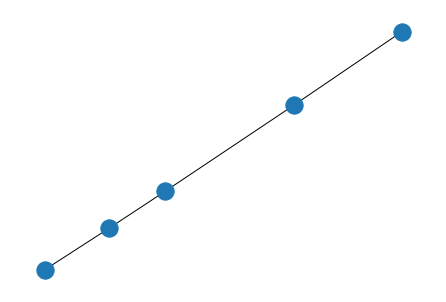

In [72]:
# basic graph drawing capability
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(H)